# 7. [Hopfield Network model of associative memory](https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html)

**Book chapters**

See [Chapter 17 Section 2](http://neuronaldynamics.epfl.ch/online/Ch17.S2.html) for an introduction to Hopfield networks.

**Python classes**

Hopfield networks can be analyzed mathematically. In this Python exercise we focus on visualization and simulation to develop our intuition about Hopfield dynamics.

We provide a couple of functions to easily create patterns, store them in the network and visualize the network dynamics. Check the modules `hopfield_network.network`, `hopfield_network.pattern_tools` and `hopfield_network.plot_tools` to learn the building blocks we provide.

**Note**

If you instantiate a new object of class `network.HopfieldNetwork` it’s default dynamics are **deterministic** and **synchronous**. That is, all states are updated at the same time using the sign function. We use this dynamics in all exercises described below.

## 7.1 Get started

Run the following code. Read the inline comments and check the documentation. The patterns and the flipped pixels are randomly chosen. Therefore the result changes every time you execute this code. Run it several times and change some parameters like `nr_patterns` and `nr_of_flips`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from neurodynex.hopfield_network import network, pattern_tools, plot_tools

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
2 * np.random.randint(0, 2, 10) - 1

array([ 1, -1, -1,  1, -1, -1, -1, -1,  1, -1])

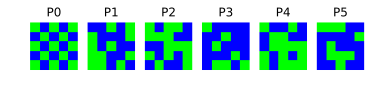

D:\Anaconda3\envs\bmnn\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


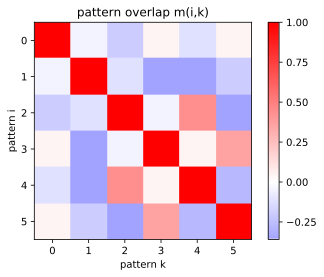

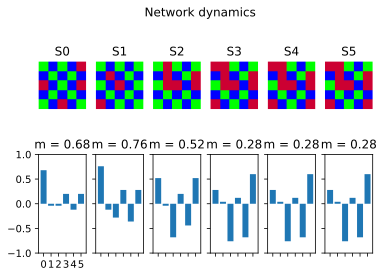

In [3]:
pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons=pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=5, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=4)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=5)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

In [ ]:
?network.HopfieldNetwork

In [5]:
?pattern_tools.PatternFactory

In [18]:
?pattern_tools.flip_n

## Introduction: Hopfield-networks

## Exercise: N=4x4 Hopfield-network

### Question:Storing a single pattern

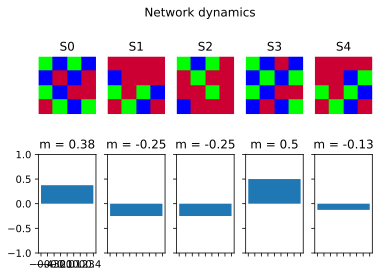

In [6]:
# nr_flipped_pixels=5

pattern_size = 4

# Create a network with N=16 neurons.
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# Create a single 4 by 4 checkerboard pattern.
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# Store the checkerboard in the network.
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# Set the initial state of the network to a noisy version of the checkerboard (nr_flipped_pixels = 5).
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=5)
hopfield_net.set_state_from_pattern(noisy_init_state)

# Let the network dynamics evolve for 4 iterations.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, 
    suptitle="Network dynamics")

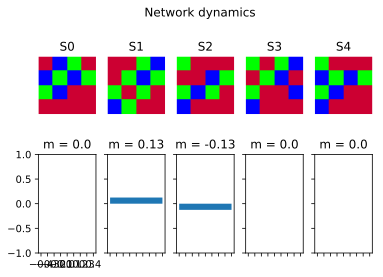

In [7]:
# nr_flipped_pixels=8

pattern_size = 4

# Create a network with N=16 neurons.
hopfield_net = network.HopfieldNetwork(
    nr_neurons= pattern_size**2)
# Create a single 4 by 4 checkerboard pattern.
factory = pattern_tools.PatternFactory(
    pattern_size, pattern_size)
# Store the checkerboard in the network.
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# Set the initial state of the network to a noisy version of the checkerboard (nr_flipped_pixels = 5).
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=8)
hopfield_net.set_state_from_pattern(noisy_init_state)

# Let the network dynamics evolve for 4 iterations.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, 
    suptitle="Network dynamics")

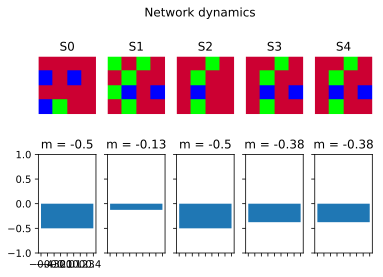

In [8]:
# nr_flipped_pixels>8

pattern_size = 4

# Create a network with N=16 neurons.
hopfield_net = network.HopfieldNetwork(
    nr_neurons= pattern_size**2)
# Create a single 4 by 4 checkerboard pattern.
factory = pattern_tools.PatternFactory(
    pattern_size, pattern_size)
# Store the checkerboard in the network.
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# Set the initial state of the network to a noisy version of the checkerboard (nr_flipped_pixels = 5).
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=12)
hopfield_net.set_state_from_pattern(noisy_init_state)

# Let the network dynamics evolve for 4 iterations.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, 
    suptitle="Network dynamics")

### Question: the weights matrix

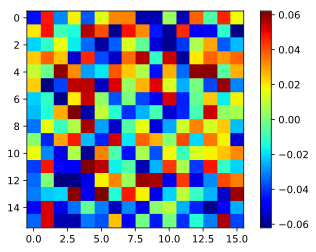

In [9]:
# object 1,2,3
pattern_size = 4
# Create a network with N=16 neurons.
hopfield_net1 = network.HopfieldNetwork(
    nr_neurons= pattern_size**2)
#size is 4
plot_tools.plot_nework_weights(hopfield_network=hopfield_net1)

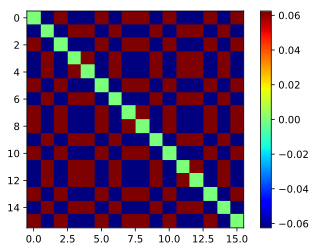

In [10]:
# object 4,5
# Create a single 4 by 4 checkerboard pattern.
factory = pattern_tools.PatternFactory(
    pattern_size, pattern_size)
# Store the checkerboard in the network.
checkerboard = factory.create_checkerboard()
pattern_list=[checkerboard]
hopfield_net1.store_patterns(pattern_list)
# indifferent from thr former one ?
plot_tools.plot_nework_weights(hopfield_network=hopfield_net1)

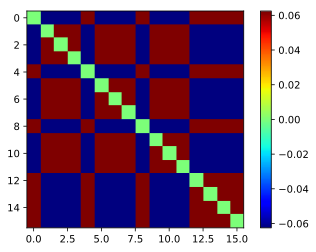

In [11]:
# object 6,7,8
pattern_size=4
# Create a network with N=16 neurons.
hopfield_net2=network.HopfieldNetwork(
    nr_neurons=pattern_size**2)
# Create a single 4 by 4 checkerboard pattern.
factory = pattern_tools.PatternFactory(
    pattern_size, pattern_size)
# Store the checkerboard in the network.
L_pattern = factory.create_L_pattern()
pattern_list=[L_pattern]
hopfield_net2.store_patterns(pattern_list)
plot_tools.plot_nework_weights(hopfield_network=hopfield_net2)

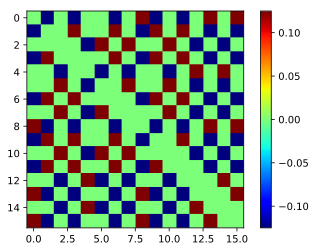

In [12]:
# object 9,10,11
pattern_size = 4
# Create a network with N=16 neurons.
hopfield_net3 = network.HopfieldNetwork(
    nr_neurons= pattern_size**2)
# Create a single 4 by 4 checkerboard pattern.
factory = pattern_tools.PatternFactory(
    pattern_size, pattern_size)
# Store the checkerboard in the network.
checkerboard = factory.create_checkerboard()
L_pattern = factory.create_L_pattern()
pattern_list = [checkerboard,L_pattern]
hopfield_net3.store_patterns(pattern_list)
plot_tools.plot_nework_weights(hopfield_network=hopfield_net3)

### Question (optional): Weights Distribution


(array([128.,   0.,   0.,   0.,   0.,  16.,   0.,   0.,   0., 112.]),
 array([-0.0625, -0.05  , -0.0375, -0.025 , -0.0125,  0.    ,  0.0125,
         0.025 ,  0.0375,  0.05  ,  0.0625]),
 <a list of 10 Patch objects>)

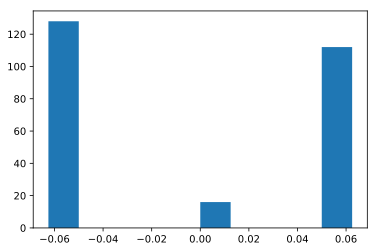

In [13]:
plt.figure()
plt.hist(hopfield_net1.weights.flatten())

(array([126.,   0.,   0.,   0.,   0.,  16.,   0.,   0.,   0., 114.]),
 array([-0.0625, -0.05  , -0.0375, -0.025 , -0.0125,  0.    ,  0.0125,
         0.025 ,  0.0375,  0.05  ,  0.0625]),
 <a list of 10 Patch objects>)

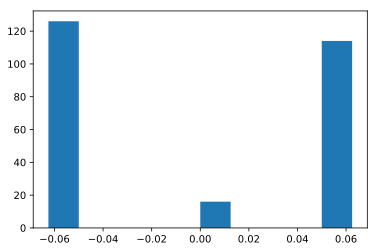

In [14]:
plt.hist(hopfield_net2.weights.flatten())

(array([ 64.,   0.,   0.,   0.,   0., 142.,   0.,   0.,   0.,  50.]),
 array([-0.125, -0.1  , -0.075, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,
         0.075,  0.1  ,  0.125]),
 <a list of 10 Patch objects>)

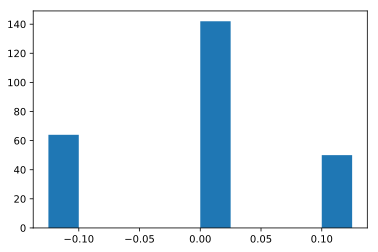

In [15]:
plt.hist(hopfield_net3.weights.flatten())

## Exercise: Capacity of an N=100 Hopfield-network

### Question

This is called associative memory because it recovers memories on the basis of similarity.

### Question

In [15]:
C_store=0.105
C_store=0.138
N=100
K=N*C_store
K

13.8

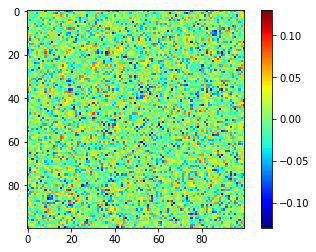

In [39]:
pattern_size=10
hopfield_net = network.HopfieldNetwork(
    nr_neurons= pattern_size**2)
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard=factory.create_checkerboard()
random_pattern= factory.create_random_pattern_list(
    nr_patterns=int(np.floor(K-1)), on_probability=0.5)
pattern_list = [checkerboard]+random_pattern
hopfield_net.store_patterns(pattern_list)
hopfield_net.set_state_from_pattern(checkerboard)
hopfield_net.run(nr_steps=20000)
plot_tools.plot_nework_weights(hopfield_network=hopfield_net)

It is symmetric in some sense

## Exercise: Non-random patterns

### Question

the alphabet is stored in an object of type: <class 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


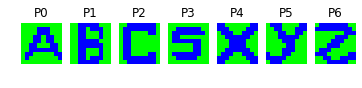

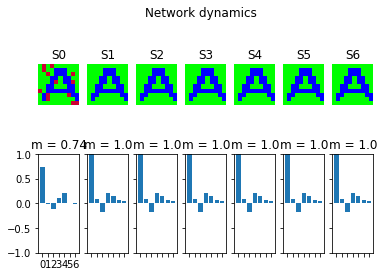

In [41]:
# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C','S', 'X', 'Y', 'Z']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state =pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)#a deficient in code
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states=hopfield_net.run_with_monitoring(nr_steps=6)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns=pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

In [22]:
pattern_tools.reshape_patterns?

In [4]:
pattern_tools.get_noisy_copy?

### Question

the alphabet is stored in an object of type: <class 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


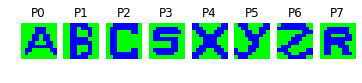

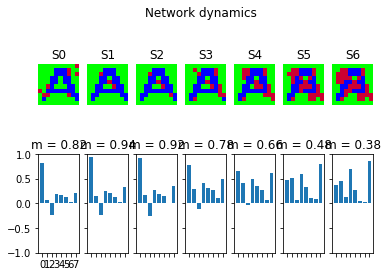

In [44]:
%matplotlib inline

import matplotlib.pyplot as plt
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
import numpy

# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C','S', 'X', 'Y', 'Z','R']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state =pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)#a deficient in code
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states=hopfield_net.run_with_monitoring(nr_steps=6)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns=pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

nope

### Question

the alphabet is stored in an object of type: <class 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


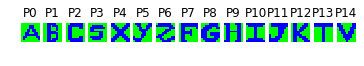

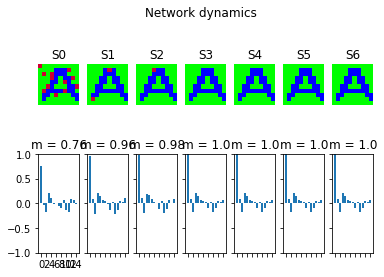

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
import numpy

# the letters we want to store in the hopfield network
letter_list = ['A','B', 'C','S', 'X', 'Y', 'Z']
letter_add=['F','G','H','I','J','K','T','V']
letter_list+=letter_add

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)


abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state =pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)#a deficient in code
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states=hopfield_net.run_with_monitoring(nr_steps=6)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns=pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

about 15 letters( This might be wrong)

## Exercise: Bonus